GD Accuracy= 0.6666666666666666
GD Log-Likelihood= -44.63587585632663
SGD Accuracy= 0.6666666666666666
SGD Log-Likelihood= -42.97421613568546


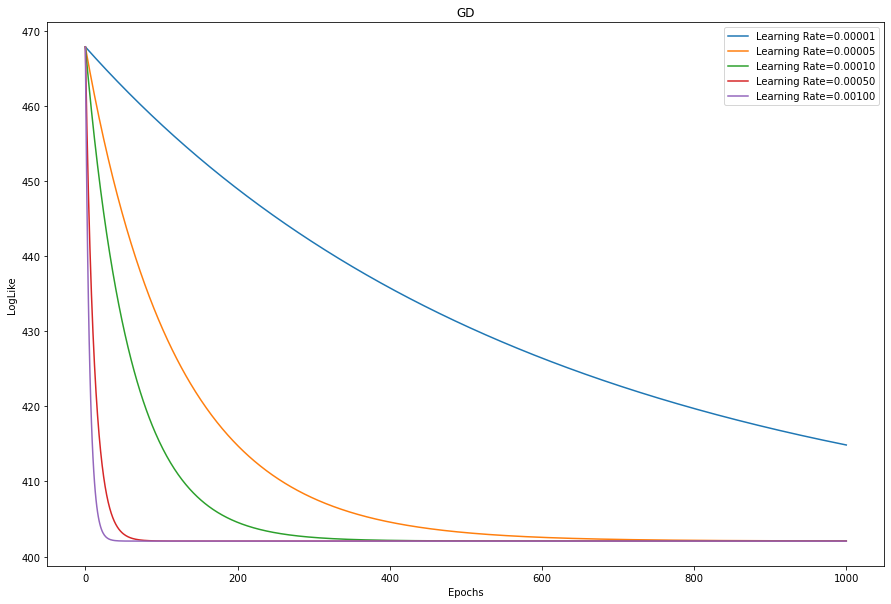

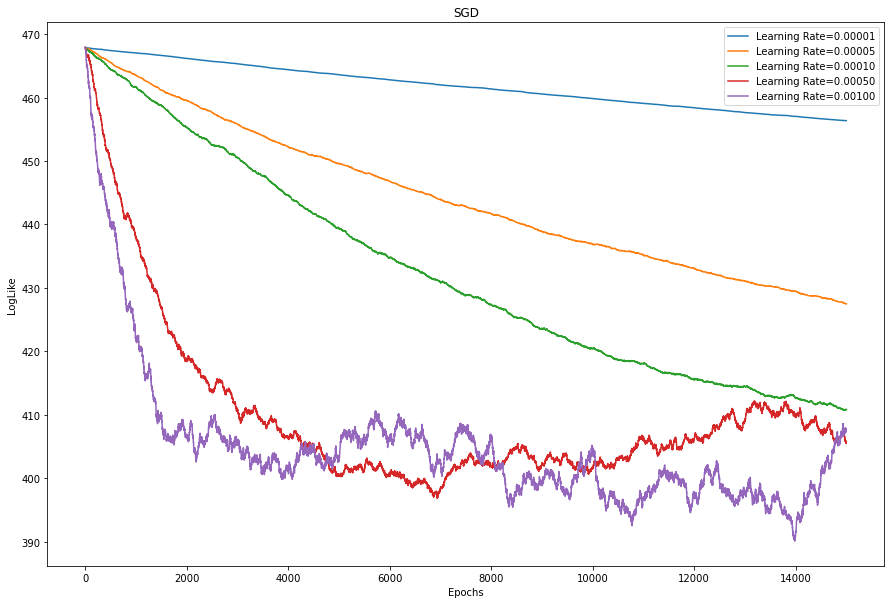

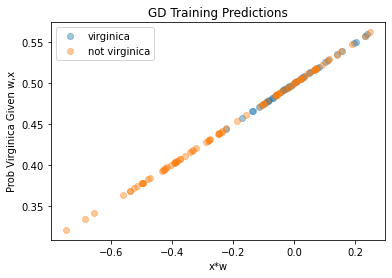

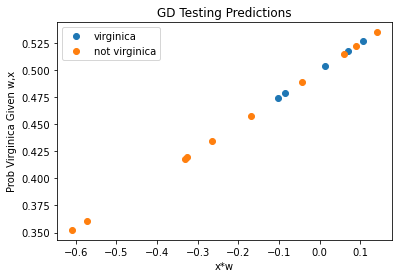

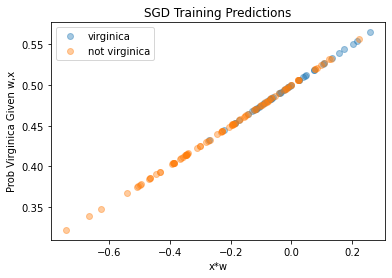

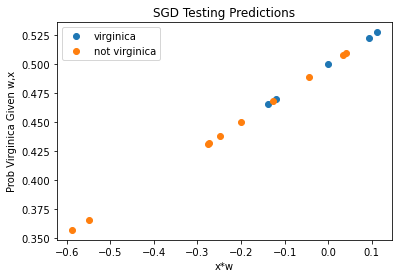

In [97]:
#Q1C

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

from data_utils import load_dataset
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('iris')

y_train = y_train[:,(1,)]
y_valid = y_valid[:,(1,)]
y_test = y_test[:,(1,)]
x_train = np.vstack([x_valid,x_train])
y_train = np.vstack([y_valid,y_train])
x_train = np.hstack([np.ones((x_train.shape[0],1)),x_train])
x_test = np.hstack([np.ones((x_test.shape[0],1)),x_test])

def loglike(x,y,w):
    f=1/(1+np.exp(-(np.dot(x,w))))   
    return -np.sum(y*np.log(f)+(1-y)*np.log(1-f)-np.transpose(w))

def gradloglike(x, y, w):
    f=1/(1+np.exp(-np.dot(x,w)))
    return np.transpose(-np.sum((y-f)*x-np.transpose(w),axis=0,keepdims=True))

def newW(w,gw,lr):
    return w-(lr*gw)

def gd(xtrain,ytrain,lr,epochs):
    wb=[]
    lb=np.inf
    plt.figure(figsize=(15,10))
    for j in range(0,len(lr)):
        w = np.zeros((x_train.shape[1], 1))
        loss = [loglike(xtrain,ytrain,w)]
        epochl=[0]
        for i in range(0,epochs):
            gw=gradloglike(xtrain,ytrain,w)
            w=newW(w,gw,lr[j])
            loss=loss+[loglike(xtrain,ytrain,w)]
            epochl=epochl+[i+1]
            if loss[-1]<lb:
                lb=loss[-1]
                wb=w.copy()
        plt.plot(epochl, loss, label="Learning Rate=%.5f"%lr[j])
    plt.ylabel("LogLike")
    plt.xlabel("Epochs")
    plt.title("GD")
    plt.legend(loc=0);
    return wb
    
lr=[0.00001,0.00005,0.0001,0.0005,0.001]
epochs=1000
wb=gd(x_train,y_train,lr,epochs)

ftest=1/(1+np.exp(-(np.dot(x_test,wb))))
acc=np.mean((ftest>0.5)==y_test)
lltest=-loglike(x_test,y_test,wb)
print('GD Accuracy=',acc)
print('GD Log-Likelihood=',lltest)


def sgd(xtrain,ytrain,lr,epochs):
    wb=[]
    lb=np.inf
    plt.figure(figsize=(15,10))
    for j in range(0,len(lr)):
        w = np.zeros((x_train.shape[1], 1))
        loss = [loglike(xtrain,ytrain,w)]
        epochl=[0]
        for i in range(0,epochs):
            ind=np.random.choice(xtrain.shape[0],size=1)
            gw=gradloglike(xtrain[ind],ytrain[ind],w)
            w=newW(w,gw,lr[j])
            loss=loss+[loglike(xtrain,ytrain,w)]
            epochl=epochl+[i+1]
            if loss[-1]<lb:
                lb=loss[-1]
                wb=w.copy()
        plt.plot(epochl, loss, label="Learning Rate=%.5f"%lr[j])
    plt.ylabel("LogLike")
    plt.xlabel("Epochs")
    plt.title("SGD")
    plt.legend(loc=0);
    return wb
    
slr=[0.00001,0.00005,0.0001,0.0005,0.001]
sepochs=15000
swb=sgd(x_train,y_train,slr,sepochs)

sftest=1/(1+np.exp(-(np.dot(x_test,swb))))
sacc=np.mean((ftest>0.5)==y_test)
slltest=-loglike(x_test,y_test,swb)
print('SGD Accuracy=',sacc)
print('SGD Log-Likelihood=',slltest)


plt.figure()
plt.title("GD Training Predictions") 
ftrain = 1. / (1. + np.exp(-x_train.dot(wb)))
plt.plot(x_train[y_train.squeeze()].dot(wb), ftrain[y_train.squeeze()], 'o', label="virginica", alpha=0.4)
plt.plot(x_train[~y_train.squeeze()].dot(wb), ftrain[~y_train.squeeze()], 'o', label="not virginica", alpha=0.4)
plt.ylabel("Prob Virginica Given w,x")
plt.xlabel("x*w")
plt.legend(loc=0);
plt.figure()
plt.title("GD Testing Predictions")
plt.plot(x_test[y_test.squeeze()].dot(wb), ftest[y_test.squeeze()], 'o', label="virginica")
plt.plot(x_test[~y_test.squeeze()].dot(wb), ftest[~y_test.squeeze()], 'o', label="not virginica")
plt.ylabel("Prob Virginica Given w,x")
plt.xlabel("x*w")
plt.legend(loc=0);


plt.figure()
plt.title("SGD Training Predictions") 
sftrain = 1. / (1. + np.exp(-x_train.dot(swb)))
plt.plot(x_train[y_train.squeeze()].dot(swb), sftrain[y_train.squeeze()], 'o', label="virginica", alpha=0.4)
plt.plot(x_train[~y_train.squeeze()].dot(swb), sftrain[~y_train.squeeze()], 'o', label="not virginica", alpha=0.4)
plt.ylabel("Prob Virginica Given w,x")
plt.xlabel("x*w")
plt.legend(loc=0);
plt.figure()
plt.title("SGD Testing Predictions")
plt.plot(x_test[y_test.squeeze()].dot(swb), sftest[y_test.squeeze()], 'o', label="virginica")
plt.plot(x_test[~y_test.squeeze()].dot(swb), sftest[~y_test.squeeze()], 'o', label="not virginica")
plt.ylabel("Prob Virginica Given w,x")
plt.xlabel("x*w")
plt.legend(loc=0);